資料來源:https://blog.keras.io/building-autoencoders-in-keras.html

使用autoencoder來作為一種壓縮工具<br>
原理是因為autoencoder具有編碼器與解碼器兩個部分，我們將資料透過編碼器去轉為特徵向量<br>
這個特徵向量就是資料壓縮完的型態，並且可以透過解碼器來還原，不過他是透過神經網路訓練的，所以沒辦法百分之百還原，是一種失真壓縮方式。

In [1]:
import tensorflow.keras as tk

from tensorflow.keras import layers
# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# 要丟進去的資料
input_img = tk.Input(shape=(784,))

# encoder將資料透過encoder去轉換成特徵向量，這部分也是我們壓縮的部分
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

# decoded是將資料做完encoded的部分做還原。
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# autoencoder的架構:encoder->decoder
autoencoder = tk.Model(input_img, decoded)

In [2]:
# encoder的部分，將資料丟進encoded的dense層
encoder = tk.Model(input_img, encoded)

In [3]:
# encoder的輸入為32維度
encoded_input = tk.Input(shape=(encoding_dim,))
# decoder_layer是autoencoder的最後一層，[-1]的寫法是說倒數第一個
decoder_layer = autoencoder.layers[-1]
# decoder的model是將做完encoded部分的資料丟進去做還原資料的步驟，也是解壓縮的部分。
decoder = tk.Model(encoded_input, decoder_layer(encoded_input))

In [4]:
#設定模型的optimizer和loss的計算方式
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [5]:
from tensorflow.keras.datasets import mnist
import numpy as np
#load資料，是mnist的data
(x_train, _), (x_test, _) = mnist.load_data()

In [6]:
#做前置處理，包含正則化和擴張
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [7]:
#訓練網路
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2752 - val_loss: 0.1890
Epoch 2/50
60000/60000 [==============================] - 1s 12us/sample - loss: 0.1708 - val_loss: 0.1531
Epoch 3/50
60000/60000 [==============================] - 1s 11us/sample - loss: 0.1437 - val_loss: 0.1332
Epoch 4/50
60000/60000 [==============================] - 1s 11us/sample - loss: 0.1278 - val_loss: 0.1206
Epoch 5/50
60000/60000 [==============================] - 1s 12us/sample - loss: 0.1177 - val_loss: 0.1126
Epoch 6/50
60000/60000 [==============================] - 1s 12us/sample - loss: 0.1109 - val_loss: 0.1068
Epoch 7/50
60000/60000 [==============================] - 1s 11us/sample - loss: 0.1061 - val_loss: 0.1028
Epoch 8/50
60000/60000 [==============================] - 1s 11us/sample - loss: 0.1024 - val_loss: 0.0995
Epoch 9/50
60000/60000 [==============================] - 1s 11us/sample - loss: 0.0996 - val_

In [8]:
#將資料丟到encoder和decoder
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

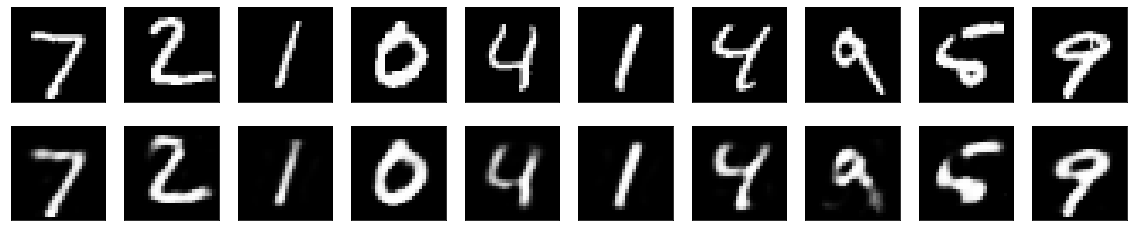

In [9]:
# 將結果show出
import matplotlib.pyplot as plt

n = 10  # 秀多少圖
plt.figure(figsize=(20, 4))
for i in range(n):
    # 原本的圖
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 壓縮後解壓的圖
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()